#**5장 – 서포트 벡터 머신**

과제는 맨 아래 부분에 있음

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 라지 마진 분류

다음 몇 개의 코드 셀은 5장 앞부분의 그래프를 만듭니다. 실제 코드 예제는 그 이후에 나옵니다:

In [ ]:
# SVM = 서포트벡터머신 -> 복잡도를 조절할수 있다는것이 큰 장점이다.

# 서포트 벡터 = 전체 샘플 중에서 각각의 경계에 위치한 샘플 
# SVM = 라지 마진 분류 -> 마진을 최대화 하도록 결정경계(특징을 나누는 경계)를 설정함 
# 마진 = 하나의 샘플과 다른 샘플사이의 최소거리 -> 클수록 일반화하기 좋다는 것이다. 
# 라지 마진 하는 이유 -> 마진이 없으면 theta가 조금만 변해도 오차가 늘어나는데(굉장히 민감한것임),
#                         마진이 있는경우는 theta가 변해도 오차가 잘 안생기게 된다.(일반화하기 좋다는것임)
# SVM의 장점 
# 1. 선형,비선형 문제에 모두 적용 가능. 
# 2. 분류,회귀 문제에 모두 적용 가능
# 3. 복잡도를 조정할 수 있음
# 4. 수학적으로 정의가 잘 되어 있음

# 따라서 마진을 가장크게 하는 서포트 벡터를 구하여 모델을 만들면 일반화하기 좋은 모델이 된다.
# SVM 단점 : 선형으로 분리가 안되는 경우(이상치가 있을경우) 사용하지 못한다

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# C 와 규제의 차이점
# C값이 작아지면 규제가 커지는 것 -> 복잡도 줄여줌
# 규제는 복잡도를 줄이기 위해 사용한다.
# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))#C를 무한대로 -> 규제 작아짐 -> 복잡도 커짐 
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

그림 저장: large_margin_classification_plot


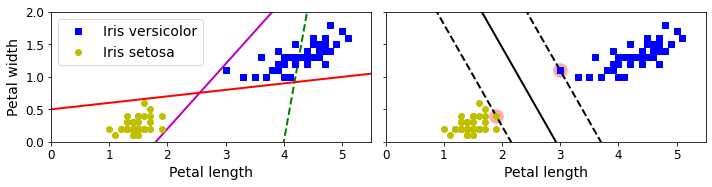

In [ ]:
# 나쁜 모델과 SVC 와 그래프로 비교
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]#기울기
    b = svm_clf.intercept_[0]# 편향

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

# 특성의 스케일에 민감함

그림 저장: sensitivity_to_feature_scales_plot


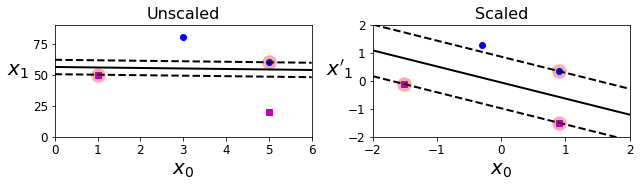

In [ ]:
# SVM은 특성 스케일에 영향 많이 받기 때문에 standardScaler 이용해서 정규화 한 후 SVM 사용한다.

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# 스케일링 안 한경우 -> 안하면 x0와 x1의 축이 많이 달라서 직선이 재대로 그려지지 않는다. 
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# standard scaler -> 스케일링 한 경우 -> x0와 x1의 값들이 일정해지면서 샘플들이 재대로 구분된다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


# 이상치에 민감함

그림 저장: sensitivity_to_outliers_plot


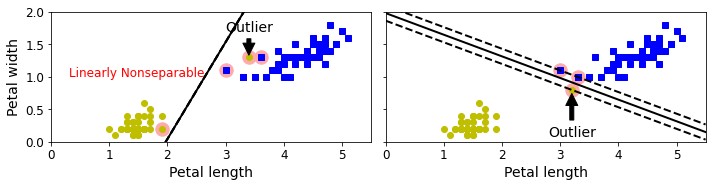

In [ ]:
# 두가지 형태의 이상치를 추가 : 결정 경계는 이상치에 민감
# 이상치가 있을 경우, 오차가 0이되는 직선을 찾지 못할수 있다.


fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

#  1) 직선으로 분리 불가능한 이상치 -> 이상치로 인해 오차가 생김
Xo1 = np.append(X, [[3.4, 1.3]], axis=0)
yo1 = np.append(y, 0)

svm_clf1 = SVC(kernel="linear", C=10**9)
svm_clf1.fit(Xo1, yo1)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plot_svc_decision_boundary(svm_clf1, 0, 5.5)
plt.text(0.3, 1.0, "Linearly Nonseparable", fontsize=12, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(3.4, 1.3),
             xytext=(3.4, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=14,
            )
plt.axis([0, 5.5, 0, 2])

#  2) 직선으로 분리가능한 이상치 -> 이상치가 없기 때문에 오차가 0이된다. 
Xo2 = np.append(X, [[3.2, 0.8]], axis=0)
yo2 = np.append(y, 0)

svm_clf2 = SVC(kernel="linear", C=10**9) # 일부러 Hard margin SVC로 설정
svm_clf2.fit(Xo2, yo2)
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(3.2, 0.8),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=14,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

# 라지 마진 vs 마진 오류

LinearSVC : default 규제값 C=1

In [ ]:
# 기본적인 SVC : SVM 분류 모델 

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(random_state=42)),  # 기본 C=1
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

규제값 C 비교 그림

In [ ]:
# 규제값을 달리해서 LinearSVC를 생성한다.
# 규제값이 1일때와 100일때로 나눠서 만든다. -> C가 커지면 규제 작아짐 -> 복잡도 커진다.

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
## 그림 그리기 위한 준비 작업들

# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

그림 저장: regularization_plot


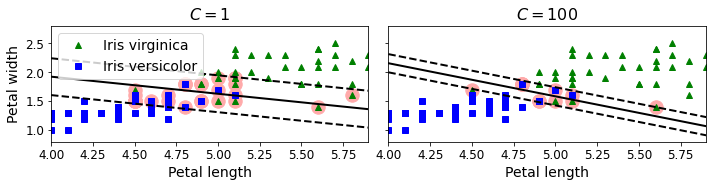

In [ ]:
# 그림 그리기
# 소프트 마진 <--> 라지 마진
# 소프트 마진 = 마진 안에 있는 값을 오류라고 판단하지 않음 -> 매개변수 C를 사용해서 마진을 조절할 수 있다.
# C가 클수록 마진 줄어든다. -> 허용하는 마진 오류 줄어듬, 모델 규제 작아짐, 복잡도 커짐

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# 비선형 분류

분리 불가능하지만 제곱항을 특징으로 추가해서 분리 가능해지는 예

그림 저장: higher_dimensions_plot


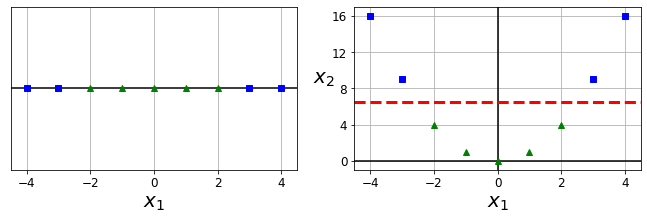

In [ ]:
# 커널은 비선형 문제에 사용된다.
# 첫 그래프는 아무리 선을 그어도 분류할수 없지만, 
# 두번째 그림은 첫 그래프를 2차항으로 바꿔서 그려보니 분류할 수 있었다
# 따라서 선형(직선)으로는 분리 불가 하지만, 새로운 특징을 추가(2차항으로 만드는 것)하여 선형(작선)으로 분리할 수 있도록할 수 있다.


X1D = np.linspace(-4, 4, 9).reshape(-1, 1) # 원 데이터 -> 1차항(아무리 선을 그어도 분류 못함)
X2D = np.c_[X1D, X1D**2]                   # 제곱항을 추가한 데이터 -> 그래프를 2차항으로 바꿈
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

make_moons 데이터 : 직선으로 분리 불가능

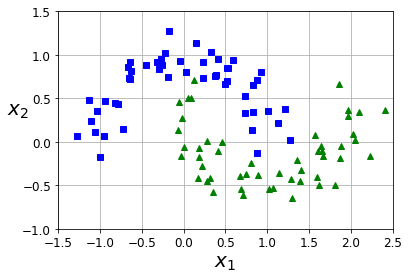

In [ ]:
# 그래프처럼 데이터가 있을경우, 선형(직선)으로 아무리 그어도 분리할 수 없다.
# 비선형 문제일 경우 직선을 이용해 분류하지 않고,다차항으로 늘려서 마진을 곡선으로 만든다. -> 좋은 방법은 아니다.


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

3차항 특징 추가한 특징 공간에서는 직선으로 분리 가능 : 원 특징공간에서 보면 결정경계는 곡선이 됨

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


그림 저장: moons_polynomial_svc_plot


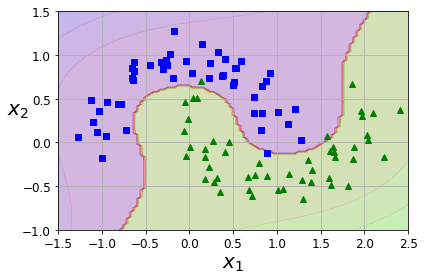

In [ ]:
# 새로운 특징을 추가하여 선형을 3차식(degree=3)으로 만들어준다.
# 직선을 이용해 곡선 그리는 방법


from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))# LinearSVC 이용 => 직선으로 함
    ])

polynomial_svm_clf.fit(X, y)

# 그림 그리기
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

특징에 고차항을 추가하는 대신 모델에 다항식 연산 기능을 설정 (고차항을 추가하기 않은 원래 데이터 사용)

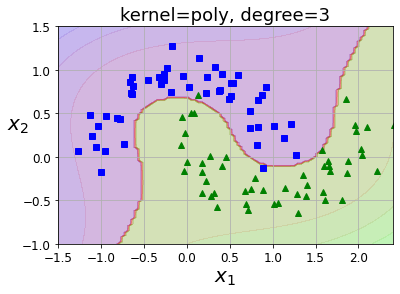

In [ ]:
# 커널 트릭 이용해서 그리기
# 커널 트릭 = 실제 다항 특징을 추가하지 않고 비슷한 효과를 만드는 수학적 트리
#  -> 앞의 수행들(다차항식(새로운 특징)을 추가하는 것)을 모델만들때 커널로 넣어주면 자동으로 다항식으로 분류해준다.
# 특징을 변환하는 대신 두 샘플사이의 유사도를 의미하는 커널을 정의
# 다항커널과 가우시안커널이 주로 사용됨
# kernel="poly"를 주고, degree(다차항 차수)-> 막 늘리면 안됨(기하급수적으로 그래프가 바뀌기 때문에), c = 규제(복잡도 조절)
# 커널에 1.Linear 주면 직선, 2.poly는 곡선, 3.sigmoid, 4.가우시안 커널(RBF)->디폴트값

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))# 모델 만들때 커널 설정 -> 자동으로 다차항으로 바꿔서 분류
    ])
poly_kernel_svm_clf.fit(X, y)

# 그림 그리기
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("kernel=poly, degree=3", fontsize=18)

plt.show()

특징공간을 가우시안 RBF로 매핑해서 분리 불가능을 분리 가능으로 할 수도 있음

식 5-1: 가우시안 RBF

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$

그림 저장: kernel_method_plot


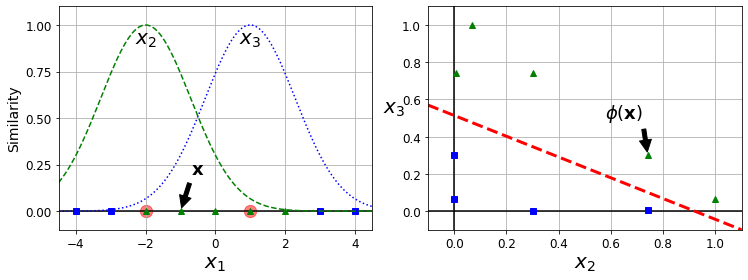

In [ ]:
# 가우시안 커널(RBF) = 커널 지정안하면 디폴트로 지정되는 값으로, 가우시안함수로 구해지는 커널임-> 가장 많이 쓰는 커널
# 간마(r)가 커지면 모델 복잡도 커진다. 
# C가 클수록 마진 줄어든다.-> 복잡도 커짐
# 왼쪽 그림은 기본공간에서의 특징을 선형으로 분류한 것이고
# 오른쪽 그림은 RBF공간에서 특징을 선형으로 분류한 것이다.
# 따라서 RBF공간으로 데이터를 변형시켜주면 직선으로 분류할 수 있다.


def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

rbf1 : landmark=-2, gamma=0.3, rbf2 = landmark=1, gamma=0.3 인 경우<p>
입력 -1이 두개의 rbf에 매핑되는 값 계산

In [ ]:
# 간마(gamma)와 C를 바꿔주면서 계산
# 간마가 커진다 -> 분산 작아진다 -> 복잡도 증가(증가할수록 다차항이됨)
# C가 커진다 -> 규제 작아진다 -> 복잡도 증가.
# 간마는 크게, C는 작게하는것이 좋음
# 따라서 간마와 c를 적절히 조절해 사용하면 분류를 더 잘 할수 있게된다.


gamma = 0.3
x1 = gaussian_rbf(np.array([[-1]]), -2, gamma)
x2 = gaussian_rbf(np.array([[-1]]), 1, gamma)
x1, x2


(array([0.74081822]), array([0.30119421]))

svm에서는 실제로 특징 공간에서 새로운 특징을 만드는 대신에 모델에서 rbf kernel 함수를 설정하기만 하면 됨

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

gamma, C 바꾸어 가면서 실험 <p>
gamma 커지면 (rbf 분산 작아짐) 더 복잡한(국소적 특성이 반영되는) 결정경계, C 커지면 규제 작아짐

그림 저장: moons_rbf_svc_plot


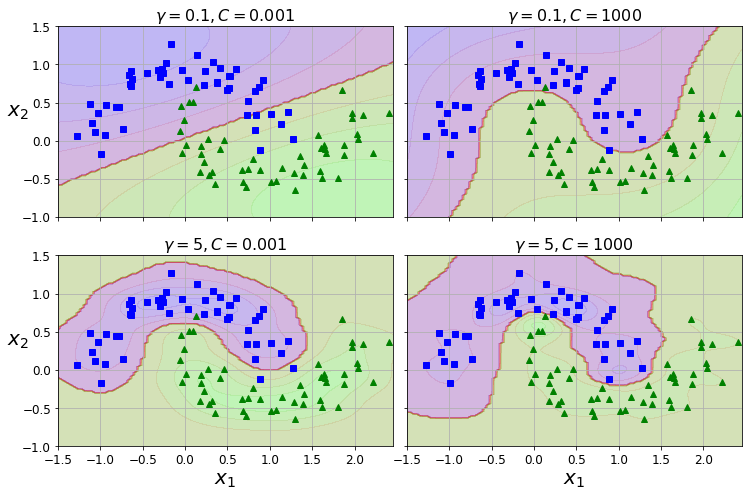

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

# 회귀

In [ ]:
# 선형(LinearSVC)  <--> 회귀(SVR)
# 회귀 = 연속된 값을 예측하는 것 <--> 분류:확률로 나온다.
# 분류와 달리 마진 안에 최대한 많은 샘플을 포함하는 것이 목적이다.
# 마진안에 샘플이 추가되어도 예측에 영향을 미치지 않음
# 규제가 커지면(복잡도(다차항 차수)가 감소) 오차는 커지지만 일반화 능력이 늘어난다.

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

그림 저장: svm_regression_plot


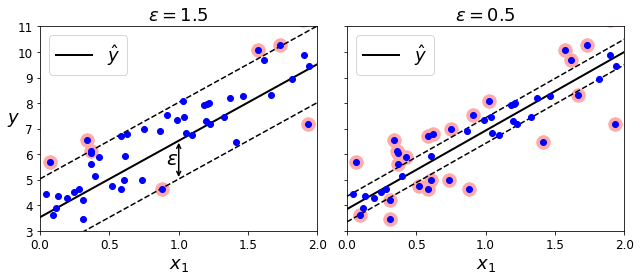

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

**노트**: 향후 버전을 위해 사이킷런 0.22에서 기본값이 될 `gamma="scale"`으로 지정했습니다.

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# 규제가 커지면 단순해진다. -> 오차가 많아진다 -> 하지만 일반화 좋아진다. 
# 규제가 작아지면 복잡해진다. -> 오차가 줄어든다 -> 일반화에 좋지 않다.(너무 트레인셋에 맞춰져버림) -> test하면 결과 좋지않음

from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

그림 저장: svm_with_polynomial_kernel_plot


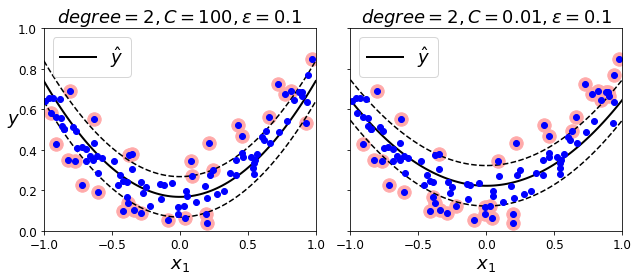

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# <font color=red> 과제 </font>
작은 fashion MNIST 데이터 (미니프로젝트 때 사용했던 데이터)에 대해 linear, poly, rbf, sigmoid 각각 커널로 svc을 수행하여 정확도를 비교하라.  위는 standardscaler를 통하지 않고 계산한 것이다.  standardscaler를 통한 후 rbf 커널로 svc를 수행한 결과도 아울러 적기 바란다.<p>  정확도는 학습데이터(아래 코드에서 X, y)을 cv=3으로 교차검증을 사용한 결과의 평균값을 출력하기 바람.

### <font color=blue> 해답 예 (결과값은 다를 수 있음) </font>
default kernel : 0.8070225914537291 <p>
kernel=linear : 0.7990055924187661 <p>
kernel=poly : 0.7410164655673638 <p>
kernel=rbf : 0.8070225914537291 <p>
kernel=sigmoid : 0.4830039620458782 <p>
StandardScaler 후 kernel=rbf : 0.7960145774517032

In [ ]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, type(X_train), y_train.shape, type(y_train)

X = X_train[:1000].reshape(-1, 784)  
y = y_train[:1000]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# 간마와 규제를 조정하면 더 좋은 결과를 얻을 수 있다.
# 간마가 커진다 -> 분산 작아진다 -> 복잡도 증가. 
# C가 커진다 -> 규제 작아진다 -> 복잡도 증가.
# 규제가 커지면 단순해진다. -> 오차가 많아진다 -> 하지만 일반화 좋아진다. 
# 규제가 작아지면 복잡해진다. -> 오차가 줄어든다 -> 일반화에 좋지 않다.(너무 트레인셋에 맞춰져버림) -> test하면 결과 좋지않음

def pipe_nomal(kernel_name):
  if kernel_name == "default":#default 면실행
    model = Pipeline([
        # ("svm_clf", SVC(degree=3, coef0=1, C=5, gamma=3))#결과 안좋음 -> gamma와 c 조정하면 결과 달라짐 ,degree 조절해도 결과 안변함
        ("svm_clf", SVC(degree=3, coef0=1 ,C=10, gamma='scale'))# 모델 만들때 커널 설정 -> 자동으로 다차항으로 바꿔서 분류
         
    ])
  elif kernel_name == "rbf_scaler":#StanderdScaler 적용시킬 rbf일경우 실행
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=3, coef0=1 ,C=10, gamma='scale'))
    ])
  else:#linear, poly, sigmoid 일 경우 실행
    model = Pipeline([
        ("svm_clf", SVC(kernel=kernel_name, degree=3, coef0=1 ,C=10, gamma='scale'))
    ])

  model.fit(X, y)
  cross_nomal = cross_val_score(model,X,y,cv=3,scoring="accuracy")
  print(kernel_name,"에 교차검증 적용: ", cross_nomal)
  cross_nomal_mean = cross_nomal.mean()
  return cross_nomal_mean

########################함수선언끝#########################################


default_accuracy_mean = pipe_nomal("default")#kernel이 rbf로 설정됨
print("kernel=default: ",default_accuracy_mean)
print()


linear_accuracy_mean = pipe_nomal("linear")
print("kernel=linear: ",linear_accuracy_mean)
print()


poly_accuracy_mean = pipe_nomal("poly")
print("kernel=poly: ",poly_accuracy_mean)
print()

rbf_accuracy_mean = pipe_nomal("rbf")
print("kernel=rbf: ",rbf_accuracy_mean)
print()

sigmoid_accuracy_mean = pipe_nomal("sigmoid")
print("kernel=sigmoid: ",sigmoid_accuracy_mean)
print()

rbf_scaler_accuracy_mean = pipe_nomal("rbf_scaler")
print("StandardScaler 적용 후 kernel=rbf_scaler: ",rbf_scaler_accuracy_mean)
print()


default 에 교차검증 적용:  [0.82335329 0.84084084 0.83483483]
kernel=default:  0.8330096563629498

linear 에 교차검증 적용:  [0.79341317 0.8018018  0.8018018 ]
kernel=linear:  0.7990055924187661

poly 에 교차검증 적용:  [0.80538922 0.83183183 0.81981982]
kernel=poly:  0.819013624402846

rbf 에 교차검증 적용:  [0.82335329 0.84084084 0.83483483]
kernel=rbf:  0.8330096563629498

sigmoid 에 교차검증 적용:  [0.4011976  0.37237237 0.31231231]
kernel=sigmoid:  0.36196076315836795

rbf_scaler 에 교차검증 적용:  [0.80538922 0.8018018  0.81381381]
StandardScaler 적용 후 kernel=rbf_scaler:  0.807001612390834

